<a href="https://colab.research.google.com/github/how-to-train-your-model/data-science-portfolio/blob/main/Digit_Recognizer_M6_M7_PP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 6 & 7: Digit Recognizer(Kaggle)

### Author: Pankaj Pant











# Project Details

Management/Research Question
In layman’s terms, what is the management/research question of interest, and why would anyone care?  


**Module 6: Requirements**


 - Fit a random forest classifier using the full set of explanatory variables and the model training set (csv).
Record the time it takes to fit the model and then evaluate the model on the csvdata by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.
 - Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components in the solution should be substantially fewer than the explanatory variables.
 - Record the time it takes to identify the principal components.
 - Using the identified principal components from step (2), use thecsvto build another random forest classifier.
 - Record the time it takes to fit the model and to evaluate the model on the csvdata by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.
 - Use k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels.  (Follow the example here if needed: kmeans mnist.pdf   Download kmeans mnist.pdf ).kmeans mnist-2.pdf   Download kmeans mnist-2.pdf  
 - Submit the RF Classifier, the PCA RF, and k-means estimations to Kaggle.com, and provide screen snapshots of your scores as well as your Kaggle.com user name.
 - The experiment we have proposed has a major design flaw. Identify the flaw. Fix it. Rerun the experiment in a way that is consistent with a training-and-test regimen, and submit this to Kaggle.com. 











**Module 7: Requirements**


 - Conduct your analysis using a cross-validation design.
 - Conduct / refine EDA.
 - Conduct Design of Experiments to evaluate the performance of various neural networks by changing the layers and nodes. Tested neural network structures should be explored within a benchmark experiment, a 2x2 completely crossed design. An example of a completely crossed designed with {2, 5} layers and {10,20} nodes follows.

 - Due to the time required to fit each neural network, we will observe only one trial for each cell in the design. 
 - You will build your models on csv and submit your forecasts for test.csv to Kaggle.com, providing your name and user ID for each experimental trial. 
 - Evaluate goodness of fit metrics on the training and validation sets.
 - Provide a multi-class confusion matrix.
 - Discuss how your models performed.



#Importing Packages

In [ ]:
#!pip install Adam
#!pip install RMSprop 

!#pip install sklearn.utils.testing

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px
#import pwlf

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score, make_scorer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.base import BaseEstimator, TransformerMixin


from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.layers import Conv2D, Input, LeakyReLU, Dense, Activation, Flatten, Dropout, MaxPool2D
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from tensorflow.keras import layers
from tensorflow.keras import models
import tensorflow as tf
from tensorflow import keras


import pickle



from datetime import datetime


%matplotlib inline
sns.set()



In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [ ]:
# Allows for muliple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Allows for viewing the complete data in a single window 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Ingestion
### Connect to google drive and import training and test data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -l "/content/drive/My Drive/Colab_Notebooks/MSDS-422/"

total 20
drwx------ 2 root root 4096 Sep  5 17:55 W1-files
drwx------ 2 root root 4096 Jan 13 04:36 W2
drwx------ 2 root root 4096 Jan 18 03:00 W3
drwx------ 2 root root 4096 Jan 28 04:38 W4
drwx------ 2 root root 4096 Feb 20 15:22 W6_7


In [ ]:
#Generalize the file path 
w6_files = "/content/drive/My Drive/Colab_Notebooks/MSDS-422/W6_7"

In [ ]:
#Create dataframe
train_df = pd.read_csv(w6_files+"/train.csv")

test_df = pd.read_csv(w6_files+"/test.csv")

print("Shape of train and test dataset :" , train_df.shape ,test_df.shape)

Shape of train and test dataset : (42000, 785) (28000, 784)


In [ ]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,...,pixel534,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixe

Null Values


In [ ]:
train_df.isnull().sum().sum()
test_df.isnull().sum().sum()

0

0

Analyze labels

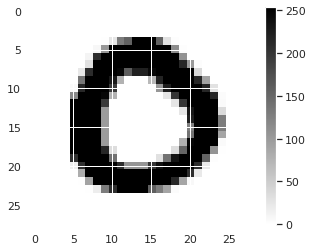

In [ ]:
digit_array = train_df.loc[4, "pixel0":]
arr = np.array(digit_array)

image_array = np.reshape(arr, (28,28))
digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)

In [ ]:
#Displays 4 handwritten digit images
def display_digits(N):
  """Picks-up randomly N images within the train dataset between 0 and 41999 and displays the images with 4 images/row"""
  images = np.random.randint(low=0, high=42001, size=N).tolist()
  subset_images = train_df.iloc[images,:]
  subset_images.index = range(1, N+1)
  print("Handwritten picked-up digits: \n", subset_images['label'].values)
  subset_images.drop(columns=['label'], inplace=True)
  print('Randomly picked-up images from the training dataset:\n')
  for i, row in subset_images.iterrows():
    plt.subplot((N//8)+1, 8, i)
    pixels = row.values.reshape((28,28))
    plt.imshow(pixels, cmap='Blues')
    plt.xticks([])
    plt.yticks([])
  plt.show()
  return

Handwritten picked-up digits: 
 [2 6 8 7 8 3 5 0 4 7 3 1 1 3 3]
Randomly picked-up images from the training dataset:



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


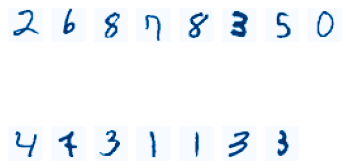

In [ ]:
display_digits(15)

# **EDA**

In [ ]:
X0 = train_df.drop(['label'], axis=1)
y0 = train_df['label']

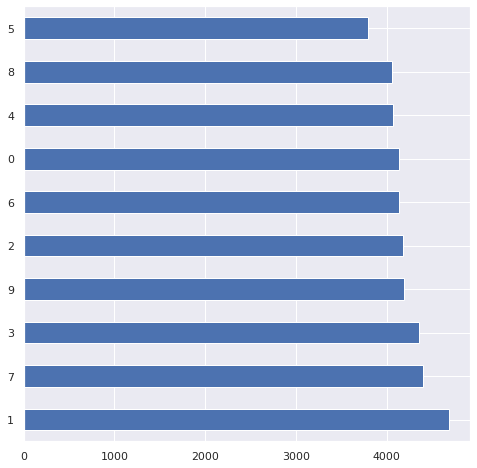

In [ ]:
y0.value_counts().plot(kind='barh', figsize=(8, 8) )

###Normalization

 - We perform a grayscale normalization to reduce the effect of illumination's differences.
 - If we perform normalization, CNN works faster.


In [ ]:
# Normalize the data
X = X0 / 255.0
test = test_df / 255.0
print("x_train shape: ",X.shape)
print("test shape: ",test.shape)



x_train shape:  (42000, 784)
test shape:  (28000, 784)


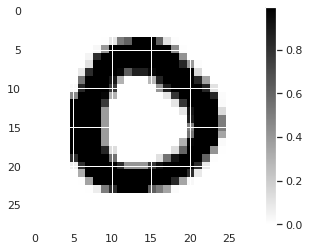

In [ ]:
digit_array = X.loc[4, "pixel0":]
arr = np.array(digit_array)

image_array = np.reshape(arr, (28,28))
digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)

Train Test Split

##Reshape

 - Train and test images (28 x 28)
 - We reshape all data to 28x28x1 3D matrices.
 - Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.


In [ ]:
# Reshape
X7 = X.values.reshape(-1,28,28,1)
test7 = test.values.reshape(-1,28,28,1)
print("X shape: ",X7.shape)
print("test shape: ",test7.shape)


X shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


## Label Encoding 


In [ ]:
# Label Encoding 
y7 = to_categorical(y0, num_classes = 10)
print("X shape: ",X7.shape)
print("y shape: ",y7.shape)

print("test shape: ",test7.shape)

X shape:  (42000, 28, 28, 1)
y shape:  (42000, 10)
test shape:  (28000, 28, 28, 1)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y0, test_size=0.2, random_state=101)
print("x_train shape",X_train.shape)
print("x_test shape",X_valid.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_valid.shape)


x_train shape (33600, 784)
x_test shape (8400, 784)
y_train shape (33600,)
y_test shape (8400,)


In [ ]:
X_train7, X_valid7, y_train7, y_valid7 = train_test_split(X7, y7, test_size=0.2, random_state=101)

print("x_train shape",X_train7.shape)
print("x_test shape",X_valid7.shape)
print("y_train shape",y_train7.shape)
print("y_test shape",y_valid7.shape)

x_train shape (33600, 28, 28, 1)
x_test shape (8400, 28, 28, 1)
y_train shape (33600, 10)
y_test shape (8400, 10)


#Random Forest Classifier 

In [ ]:
start_time = datetime.now()
rfc = RandomForestClassifier(n_estimators=100 ,criterion= 'gini',
                             max_depth=5 , max_features = 'log2',
                             min_samples_split = 8 , min_samples_leaf = 12)
#Train the model using the training sets
rfc.fit(X_train, y_train)
y_pred = cross_val_predict(rfc, X_train, y_train, cv = 3)
print('The efficiency metrics of the Random Forest Classification for Train data is :')
print(metrics.classification_report(y_train, y_pred, digits=4))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
# support column lists the number of samples for each class

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=12,
                       min_samples_split=8)

The efficiency metrics of the Random Forest Classification for Train data is :
              precision    recall  f1-score   support

           0     0.8938    0.9614    0.9264      3343
           1     0.7863    0.9866    0.8751      3736
           2     0.9076    0.8466    0.8760      3318
           3     0.7604    0.8471    0.8014      3492
           4     0.8682    0.8377    0.8527      3254
           5     0.9527    0.6058    0.7407      3062
           6     0.8799    0.9267    0.9027      3313
           7     0.8521    0.8963    0.8736      3528
           8     0.8788    0.7626    0.8166      3243
           9     0.8065    0.7868    0.7965      3311

    accuracy                         0.8499     33600
   macro avg     0.8586    0.8458    0.8462     33600
weighted avg     0.8564    0.8499    0.8474     33600

Duration: 0:00:08.933629


In [ ]:
# Validate the model
start_time = datetime.now()
y_hat_pred=rfc.predict(X_valid)
print('The efficiency metrics of the Random Forest Classification for Validation data is :')
print(metrics.classification_report(y_valid, y_hat_pred, digits=4))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

The efficiency metrics of the Random Forest Classification for Validation data is :
              precision    recall  f1-score   support

           0     0.8925    0.9683    0.9289       789
           1     0.7600    0.9852    0.8581       948
           2     0.8943    0.8277    0.8597       859
           3     0.7758    0.8498    0.8111       859
           4     0.8584    0.8374    0.8478       818
           5     0.9622    0.6248    0.7577       733
           6     0.9001    0.9296    0.9146       824
           7     0.8576    0.8969    0.8768       873
           8     0.8900    0.7598    0.8197       820
           9     0.8109    0.7777    0.7939       877

    accuracy                         0.8495      8400
   macro avg     0.8602    0.8457    0.8468      8400
weighted avg     0.8569    0.8495    0.8474      8400

Duration: 0:00:00.142442


Text(0.5, 2, 'Confusion Matrix for Random Forest Classification for Validation dataset')

Text(84.5, 0.5, 'Predicted Digits')

Text(0.5, 84.5, 'Actual Digits')

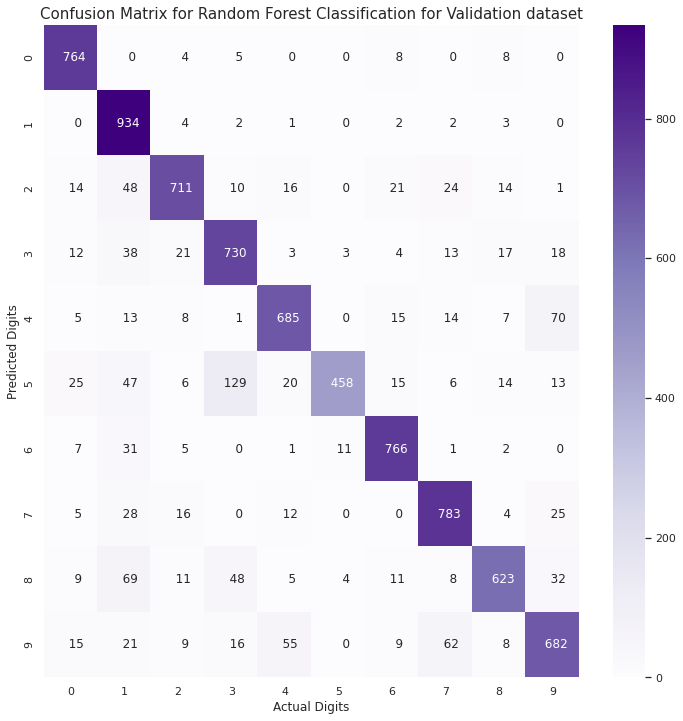

In [ ]:
fig = plt.figure(figsize=(12,12))

sns.heatmap(metrics.confusion_matrix(y_valid, y_hat_pred),annot=True,fmt='5.0f',cmap="Purples")
plt.title('Confusion Matrix for Random Forest Classification for Validation dataset', y=2, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

## Random Forest testing

In [ ]:
test_df = pd.read_csv(w6_files+"/test.csv")

In [ ]:
#Random forest output for the Test dataset :

y_hat_rf = rfc.predict(test_df)
test_df['rf_label'] = (y_hat_rf)



In [ ]:


# Creating a dataframe for results
kag_sub = pd.DataFrame({'ImageId': test_df.index, 'Label': test_df['rf_label']})
kag_sub["ImageId"] += 1
kag_sub.head()

kag_sub.to_csv('submission_rfc.csv', index=False)
print("Results are saved to submission.csv")

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,2


Results are saved to submission.csv


## Kagggle Score: 0.85467

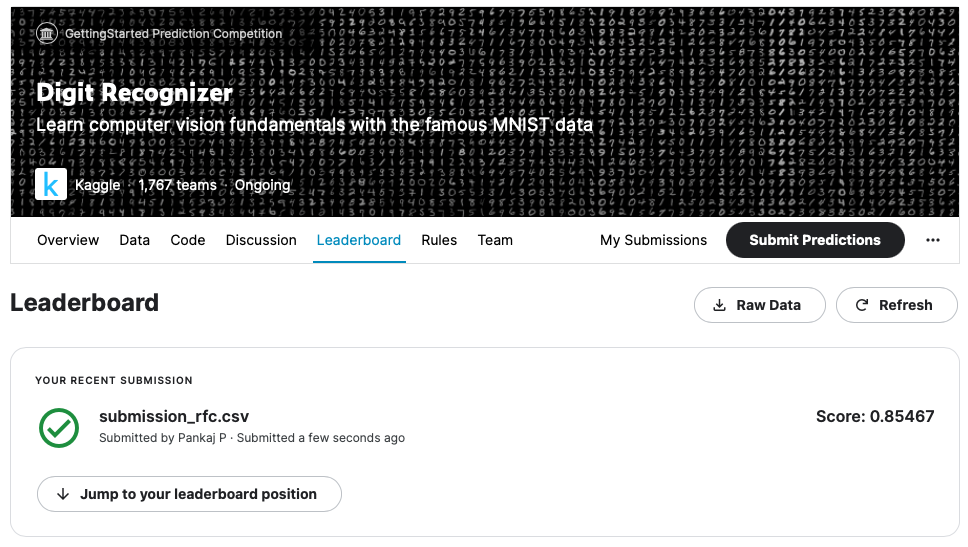

#PCA

Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components in the solution should be substantially fewer than the explanatory variables.

In [ ]:
X_train = train_df.drop(['label'], axis=1)
y = train_df['label']
test_df = pd.read_csv(w6_files+"/test.csv")
X_train.shape
test_df.shape

(42000, 784)

(28000, 784)

In [ ]:
X_train_test = pd.concat((X_train, test_df)).reset_index(drop=True)
X_train_test.shape
X_train_test.info()

(70000, 784)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 418.7 MB


In [ ]:
# Scaling
X_train_test_sc = MinMaxScaler().fit_transform(X_train_test)

In [ ]:
start_time = datetime.now()
pca = PCA(0.95)
pc_fit = pca.fit_transform(X_train_test_sc)
end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))


Duration: 0:00:06.427067


In [ ]:
#Checking if 95% is explained
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(max(var1))

95.08999999999988


<BarContainer object of 154 artists>

Text(0, 0.5, 'Explained variance')

Text(0.5, 0, 'Components')

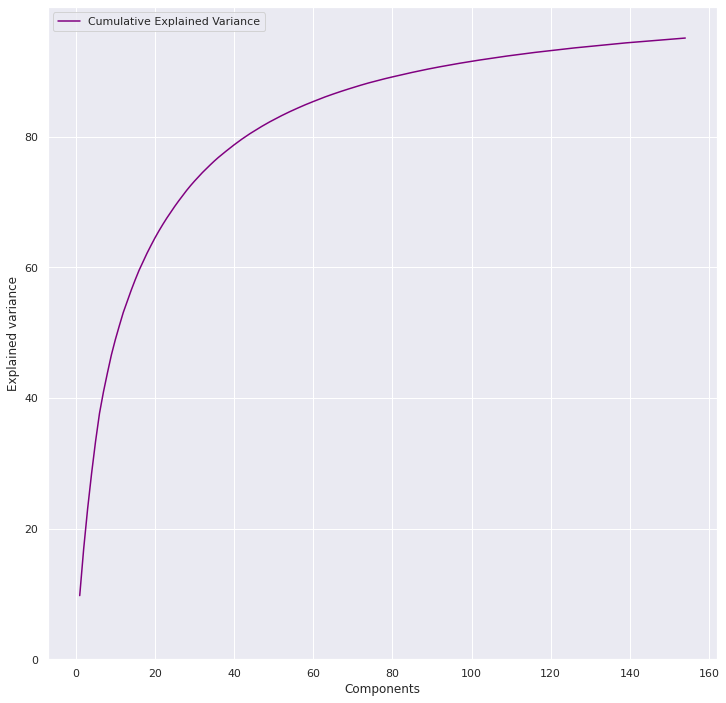

In [ ]:
fig = plt.figure(figsize=(12,12))
plt.bar(range(1,len(var)+1),var)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(var)+1),
         var1,
         c='purple',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')
plt.show()

In [ ]:
pc = pca.fit_transform(X_train_test_sc)
pca_df = pd.DataFrame(data = pc)
pca_df.add_prefix('pca_')
pca_df.shape
X_train_test.shape


,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,pca_40,pca_41,pca_42,pca_43,pca_44,pca_45,pca_46,pca_47,pca_48,pca_49,pca_50,pca_51,pca_52,pca_53,pca_54,pca_55,pca_56,pca_57,pca_58,pca_59,pca_60,pca_61,pca_62,pca_63,pca_64,pca_65,pca_66,pca_67,pca_68,pca_69,pca_70,pca_71,pca_72,pca_73,pca_74,pca_75,pca_76,pca_77,pca_78,pca_79,pca_80,pca_81,pca_82,pca_83,pca_84,pca_85,pca_86,pca_87,pca_88,pca_89,pca_90,pca_91,pca_92,pca_93,pca_94,pca_95,pca_96,pca_97,pca_98,pca_99,pca_100,pca_101,pca_102,pca_103,pca_104,pca_105,pca_106,pca_107,pca_108,pca_109,pca_110,pca_111,pca_112,pca_113,pca_114,pca_115,pca_116,pca_117,pca_118,pca_119,pca_120,pca_121,pca_122,pca_123,pca_124,pca_125,pca_126,pca_127,pca_128,pca_129,pca_130,pca_131,pca_132,pca_133,pca_134,pca_135,pca_136,pca_137,pca_138,pca_139,pca_140,pca_141,pca_142,pca_143,pca_144,pca_145,pca_146,pca_147,pca_148,pca_149,pca_150,pca_151,pca_152,pca_153
0,-2.649512,-2.678101,0.731367,0.499176,-0.307317,1.914216,-2.713889,0.325084,1.283008,0.796547,-1.451107,0.038292,1.516601,-0.500840,0.283967,-0.435342,0.299545,1.072575,0.145146,0.765211,0.185729,0.841241,0.233273,-0.608150,-0.019021,-0.208773,-1.203282,0.956319,-0.383960,0.254912,-0.031055,-0.053468,-0.785412,-0.163299,0.016148,0.610023,-0.148433,-0.308959,-0.554761,0.614820,0.352236,0.165533,0.099258,-0.219355,-0.734853,0.332322,-0.212890,-0.226773,-0.275718,0.126595,0.428248,-0.455543,-0.373613,0.077373,0.204887,0.063500,-0.357612,0.342448,0.040754,-0.044670,-0.083979,0.108910,-0.170692,-0.378710,0.167481,0.414900,-0.111518,0.167586,0.263076,0.010502,-0.388284,0.006734,0.075039,-0.197943,0.436626,0.075864,-0.057230,-0.048277,-0.122412,0.173033,0.078255,-0.300646,-0.275620,-0.104924,-0.098977,-0.050594,-0.087067,0.148493,0.014070,-0.094050,-0.185084,0.323229,-0.171450,0.218616,0.072416,0.006074,0.027881,0.145841,-0.196221,-0.034501,0.209362,0.044730,-0.017402,-0.012120,-0.084134,0.142193,0.039744,-0.070301,0.102895,-0.097115,0.006216,-0.127214,-0.148210,-0.176352,-0.085183,-0.104706,-0.134716,-0.010941,0.091680,0.232868,-0.058528,0.045713,0.030307,-0.043463,-0.065097,-0.112955,0.040286,-0.162065,0.122197,0.117864,0.136650,-0.061401,-0.018066,-0.093976,0.034766,0.054360,-0.117419,0.029061,0.085090,-0.109919,0.000371,-0.043229,-0.034459,0.014147,-0.151254,0.199813,0.066734,-0.020700,0.071398,-0.036675,-0.124300,-0.042747,-0.064033,0.249281
1,6.629902,-1.576738,-1.916020,1.359732,-1.776491,2.890811,2.596223,-0.712451,-0.015692,0.264576,0.133442,0.191101,-0.452254,-1.337285,1.449293,0.033383,1.323357,0.116897,-0.361294,-0.674815,-0.826254,-1.059776,-0.007477,-0.043833,-0.000810,1.046190,-0.315914,0.110108,0.342383,-0.316875,0.192353,0.671697,-0.484722,0.205492,0.017229,0.381110,-0.437862,-0.188547,0.304465,-0.436245,0.037195,0.077521,0.052029,-0.238865,-0.426900,-0.022743,-0.029812,-0.587099,0.514447,-0.060768,0.457010,-0.374203,0.367016,-0.069482,0.390722,-0.271148,-0.398971,0.040274,-0.056707,-0.612767,0.518340,-0.030821,-0.079045,-0.163703,-0.388237,-0.389559,0.179696,-0.397535,0.169885,0.239319,-0.234451,0.077245,0.386025,0.013424,-0.327570,-0.038629,-0.399660,-0.538565,-0.407253,-0.090174,-0.269403,-0.095068,-0.010316,-0.080253,-0.056807,-0.313638,-0.255381,-0.071358,0.191543,-0.134897,-0.200515,-0.343886,-0.268230,0.554967,-0.029703,0.190765,-0.125849,0.077331,0.042870,-0.370413,-0.387948,-0.074432,-0.065978,0.040458,-0.101957,-0.065227,-0.379719,0.177319,0.161977,-0.096410,0.175227,-0.063105,0.040810,0.069311,-0.123336,-0.329020,0.163774,0.158202,0.051299,-0.198707,0.316846,-0.067836,0.128418,0.011712,-0.125457,0.149692,0.188421,-0.319889,0.089288,0.087572,0.059817,-0.138489,0.031187,-0.217866,-0.082749,-0.034819,-0.010476,-0.121177,-0.049674,-0.166396,0.195990,0.000588,-0.154958,0.113113,-0.166519,0.038795,0.055731,-0

(70000, 154)

(70000, 784)

In [ ]:
train_df.shape 
pca_df.shape
y.shape

(42000, 785)

(70000, 154)

(42000,)

In [ ]:
r,c = train_df.shape 
pca_train_data = pca_df.iloc[:r, :] 
pca_test_data = pca_df.iloc[r:, :]

pca_train_data.shape
pca_test_data.shape


(42000, 154)

(28000, 154)

In [ ]:
train_df.index.max()
print('\n',pca_train_data.index.max())
print('\n',pca_test_data.index.min(), pca_test_data.index.max())


41999


 41999

 42000 69999


# PCA + Random Forest

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(pca_train_data, y, test_size=0.3, random_state=101)

In [ ]:
start_time = datetime.now()

rfc_pca = RandomForestClassifier(n_estimators=100 ,criterion= 'gini',max_depth=5 , max_features = 'log2',min_samples_split = 8 , min_samples_leaf = 12)


rfc_pca.fit(X_train, y_train)
y_pred=rfc_pca.predict(X_train)
from sklearn import metrics
print('The efficiency metrics of the Random Forest Classification for training PCA data is :')
print(metrics.classification_report(y_train, y_pred, digits=4))
end_time = datetime.now()

# Time
print('Duration: {}'.format(end_time - start_time))



RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=12,
                       min_samples_split=8)

The efficiency metrics of the Random Forest Classification for training PCA data is :
              precision    recall  f1-score   support

           0     0.9232    0.8530    0.8868      2919
           1     0.8224    0.9755    0.8924      3262
           2     0.8774    0.8020    0.8380      2919
           3     0.7086    0.8849    0.7870      3067
           4     0.8740    0.8289    0.8508      2863
           5     0.9088    0.6376    0.7495      2674
           6     0.8567    0.9375    0.8953      2895
           7     0.8457    0.8863    0.8655      3086
           8     0.8179    0.7775    0.7972      2836
           9     0.8296    0.7628    0.7948      2879

    accuracy                         0.8386     29400
   macro avg     0.8465    0.8346    0.8357     29400
weighted avg     0.8450    0.8386    0.8371     29400

Duration: 0:00:09.243150


In [ ]:
start_time = datetime.now()
y_hat_pred=rfc_pca.predict(X_valid)

print('The efficiency metrics of the Random Forest Classification for Validation PCA xdata is :')
print(metrics.classification_report(y_valid, y_hat_pred, digits=4))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

The efficiency metrics of the Random Forest Classification for Validation PCA xdata is :
              precision    recall  f1-score   support

           0     0.9194    0.8368    0.8761      1213
           1     0.8036    0.9698    0.8789      1422
           2     0.8488    0.7766    0.8111      1258
           3     0.6780    0.8544    0.7560      1284
           4     0.8529    0.8296    0.8411      1209
           5     0.8893    0.6093    0.7231      1121
           6     0.8494    0.9308    0.8882      1242
           7     0.8432    0.8707    0.8567      1315
           8     0.8169    0.7816    0.7988      1227
           9     0.8330    0.7471    0.7878      1309

    accuracy                         0.8248     12600
   macro avg     0.8334    0.8207    0.8218     12600
weighted avg     0.8318    0.8248    0.8232     12600

Duration: 0:00:00.167769


In [ ]:
#Random forest output for the Test dataset :

y_hat_rf = rfc_pca.predict(pca_test_data)
test_df['rf_pca_label'] = (y_hat_rf)


In [ ]:


# Creating a dataframe for results
pca_test_data.index = np.arange(1, len(pca_test_data)+1)
kag_sub = pd.DataFrame({'ImageId': pca_test_data.index, 'Label': test_df['rf_pca_label']})

#kag_sub["ImageId"] += 1
kag_sub.head()
kag_sub.shape

kag_sub.to_csv('submission_rfc_pca.csv', index=False)
print("Results are saved to submission.csv")

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3


(28000, 2)

Results are saved to submission.csv


## Kaggle Score: 0.83053

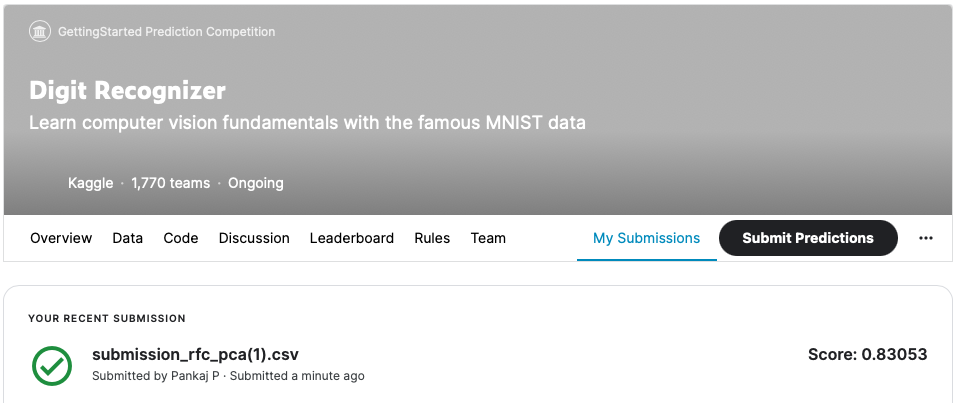

#K-mean clustering

Use k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels. 



In [ ]:
train_data = train_df.drop(['label'], axis=1)
train_label = train_df['label']
test_df = pd.read_csv(w6_files+"/test.csv")
train_data.shape
test_df.shape
train_label.shape

(42000, 784)

(28000, 784)

(42000,)

In [ ]:
y_labels = train_label.values.ravel()
labels_count = np.unique(y_labels).shape[0]

In [ ]:
train_data.isnull().sum().sum() , test_df.isnull().sum().sum()


(0, 0)

In [ ]:
from sklearn.pipeline import Pipeline

X = train_data.values.reshape(-1,28,28)

class Scale(BaseEstimator, TransformerMixin):
  def __init__(self):
    pass
  def fit(self, X, y = None):
    return self
  def transform(self, X, y = None):  
    return X/255

pipeline = Pipeline(steps = [
                                   ('Scale', Scale())
                                  ])

#Preprocess
X_preproc = pipeline.fit_transform(X)
test_preproc = pipeline.fit_transform(test_df)
X_test = test_preproc

In [ ]:
X_preproc.shape
X_test.shape
y_labels.shape

(42000, 28, 28)

(28000, 784)

(42000,)

In [ ]:
#K_train_SS = StandardScaler().fit_transform(K_train)
X_train, X_valid, y_train, y_valid = train_test_split(X_preproc, y_labels, test_size=0.2, random_state=101)
print('Training Data: {}'.format(X_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Training Data: (33600, 28, 28)
Training Labels: (33600,)


In [ ]:
print('Testing Data: {}'.format(X_valid.shape))
print('Testing Labels: {}'.format(y_valid.shape))

Testing Data: (8400, 28, 28)
Testing Labels: (8400,)


In [ ]:
# from keras.datasets import mnist

# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# print('Training Data: {}'.format(x_train.shape))
# print('Training Labels: {}'.format(y_train.shape))

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

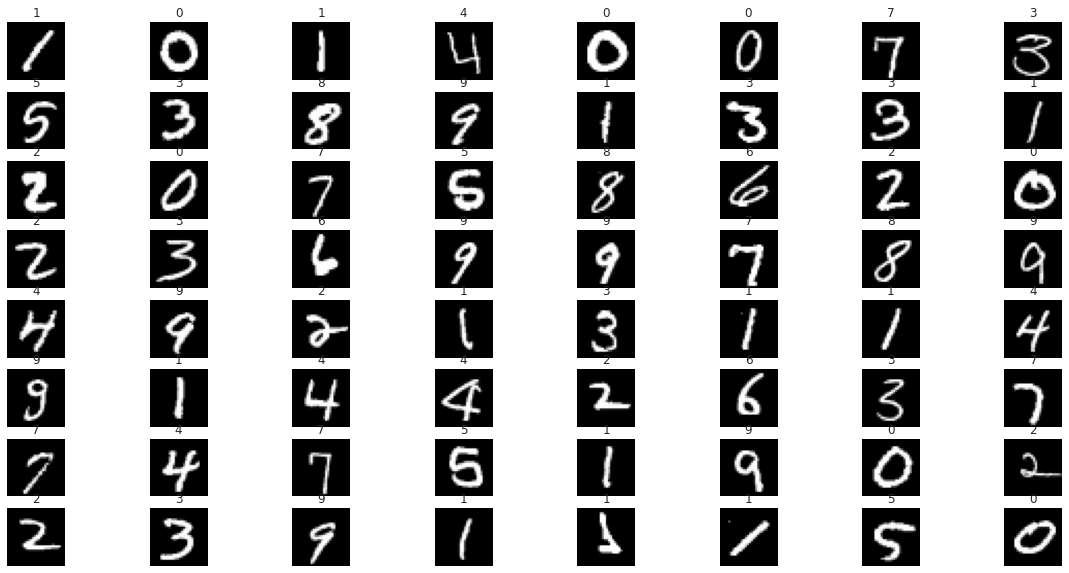

In [ ]:
# # create figure with 3x3 subplots using matplotlib.pyplot
# fig, axs = plt.subplots(3, 3, figsize = (12, 12))
# plt.gray()

# # loop through subplots and add mnist images
# for i, ax in enumerate(axs.flat):
#     ax.matshow(X_train[i])
#     ax.axis('off')
#     ax.set_title('Number {}'.format(y_train[i]))
    
# # display the figure
# fig.show()

fig, axes = plt.subplots(nrows = 8, ncols = 8, figsize  = (20,10))
for i,ax in enumerate(axes.flatten()):
  ax.imshow(X_preproc[i].reshape(28,28), cmap = 'gray')
  ax.set_title(y[i].round(2))
  ax.axis('off');

In [ ]:
# preprocessing the images

# convert each image to 1 dimensional array
X = X_train.reshape(len(X_train),-1)
Y = y_train

# normalize the data to 0 - 1
X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(33600, 784)
(784,)


In [ ]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_valid))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data
kmeans.fit(X)

10


MiniBatchKMeans(n_clusters=10)

In [ ]:
kmeans.labels_

array([8, 5, 0, ..., 2, 5, 8], dtype=int32)

In [ ]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [ ]:
# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)
# Fit the model to the training data
kmeans.fit(X)
kmeans.labels_

MiniBatchKMeans(n_clusters=10)

array([9, 9, 1, ..., 1, 8, 9], dtype=int32)

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

Text(0.5, 1.0, 'Elbow Plot')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

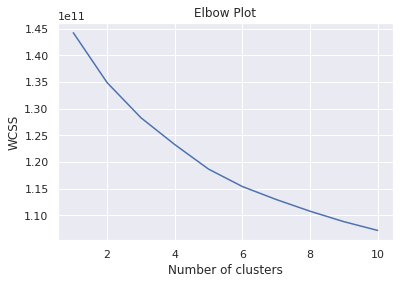

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(train_data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, y_labels)
X_clusters = kmeans.predict(train_data)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print (predicted_labels[:20])
print (Y[:20])

[1 0 1 4 0 4 7 3 8 3 8 7 1 3 3 1 3 0 7 3]
[7 7 9 0 1 5 3 0 3 1 1 6 4 9 6 7 1 6 2 7]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_labels, predicted_labels)

0.5907380952380953

In [ ]:
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, y_labels)
X_clusters = kmeans.predict(test_df)
test_pred_labels = infer_data_labels(X_clusters, cluster_labels)
print (test_pred_labels[:20])

[2 0 7 7 2 7 0 3 0 3 3 7 4 0 4 0 3 1 4 0]


Text(0.5, 1.05, 'Confusion Matrix of K-means clustering for Train dataset is')

Text(80.90000000000006, 0.5, 'Predicted Digits')

Text(0.5, 12.5, 'Actual Digits')

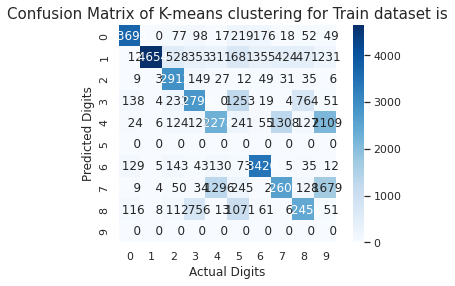

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_labels, predicted_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='5.0f',cmap="Blues")
plt.title('Confusion Matrix of K-means clustering for Train dataset is', y=1.05, size=15)
plt.ylabel('Predicted Digits')
plt.xlabel('Actual Digits')

In [ ]:
from sklearn import metrics

def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [ ]:
start_time = datetime.now()
clusters = [8, 16, 32, 64, 128, 256]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(train_data)
    
    # print cluster metrics
    calculate_metrics(estimator, X, y_labels)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, y_labels)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(y_labels, predicted_Y)))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

MiniBatchKMeans()

Number of Clusters: 8
Inertia: 111279090638.9139
Homogeneity: 0.4207712496299595
Accuracy: 0.528452380952381



MiniBatchKMeans(n_clusters=16)

Number of Clusters: 16
Inertia: 102521866057.14957
Homogeneity: 0.5145528146921352
Accuracy: 0.599452380952381



MiniBatchKMeans(n_clusters=32)

Number of Clusters: 32
Inertia: 90114329616.67203
Homogeneity: 0.6840276846298103
Accuracy: 0.7561904761904762



MiniBatchKMeans(n_clusters=64)

Number of Clusters: 64
Inertia: 82575557172.24797
Homogeneity: 0.7474959386935177
Accuracy: 0.8228809523809524



MiniBatchKMeans(n_clusters=128)

Number of Clusters: 128
Inertia: 74881411970.93944
Homogeneity: 0.8008389294639041
Accuracy: 0.8596190476190476



MiniBatchKMeans(n_clusters=256)

Number of Clusters: 256
Inertia: 68584878623.9351
Homogeneity: 0.8449742329850154
Accuracy: 0.8978333333333334

Duration: 0:00:36.465950


In [ ]:
# Full training data

start_time = datetime.now()
train_data1 = np.multiply(train_data, 1.0 / 255.0)
k_estimator = MiniBatchKMeans(n_clusters = 512)
train_data_fit = k_estimator.fit(train_data1)
k_estimator.fit(train_data1)
k_estimator.labels_[:20]
k_estimator.predict(train_data1)[:20]



MiniBatchKMeans(n_clusters=512)

array([283, 303, 429, 264, 128,  47,   9,  70,  94, 381, 456, 120,  13,
       170, 244, 222, 360, 242, 311,  27], dtype=int32)

array([283, 303, 429, 264, 128,  47,   9,  70,  94, 381, 456, 120,  13,
       170, 244, 222, 360, 242, 311,  27], dtype=int32)

In [ ]:
# Full training data
# determine predicted labels
cluster_labels = infer_cluster_labels(k_estimator, y_labels)
#cluster_labels
train_pred_labels = infer_data_labels(k_estimator.labels_, cluster_labels)  
end_time = datetime.now()
train_pred_labels[:20]
print('Duration: {}'.format(end_time - start_time))

accuracy_score(y_labels, train_pred_labels)

array([1, 0, 1, 2, 0, 0, 7, 5, 5, 3, 8, 9, 1, 3, 3, 1, 2, 0, 7, 6],
      dtype=uint8)

Duration: 0:00:44.670434


0.9152857142857143

In [ ]:
# Full testing data
test_data1 = np.multiply(test_df, 1.0 / 255.0)
test_data1.shape
test_predictions = k_estimator.predict(test_data1)
test_predictions[:10]
print('\ntotal testing labels',len(k_estimator.predict(test_data1)))
print('\ntotal testing labels',len(test_predictions))

(28000, 784)

array([ 16, 135,  90, 430, 288, 183, 324, 400,  32, 400], dtype=int32)


total testing labels 28000

total testing labels 28000


In [ ]:
# Full testing data

predicted_test_labels = np.zeros(len(k_estimator.predict(test_data1))).astype(np.uint8)
for i, cluster in enumerate(k_estimator.predict(test_data1)):
  for key, value in cluster_labels.items():
    if cluster in value:
      predicted_test_labels[i] = key


In [ ]:
predicted_test_labels

array([2, 0, 7, ..., 3, 9, 2], dtype=uint8)

In [ ]:
test_df['pred_label'] = (predicted_test_labels)


In [ ]:
test_df.head()
test_df['pred_label'].unique()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,...,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,p

array([2, 0, 7, 4, 3, 5, 9, 1, 6, 8], dtype=uint8)

In [ ]:
# Creating a dataframe for results
kag_sub = pd.DataFrame({'ImageId': np.arange(1, len(test_df)+1), 'Label': test_df['pred_label']})

#kag_sub["ImageId"] += 1
kag_sub.tail()
kag_sub.shape

kag_sub.to_csv('submission_k.csv', index=False)
print("Results are saved to submission.csv")

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


(28000, 2)

Results are saved to submission.csv


## K-Means Kaggle score:  0.91535 


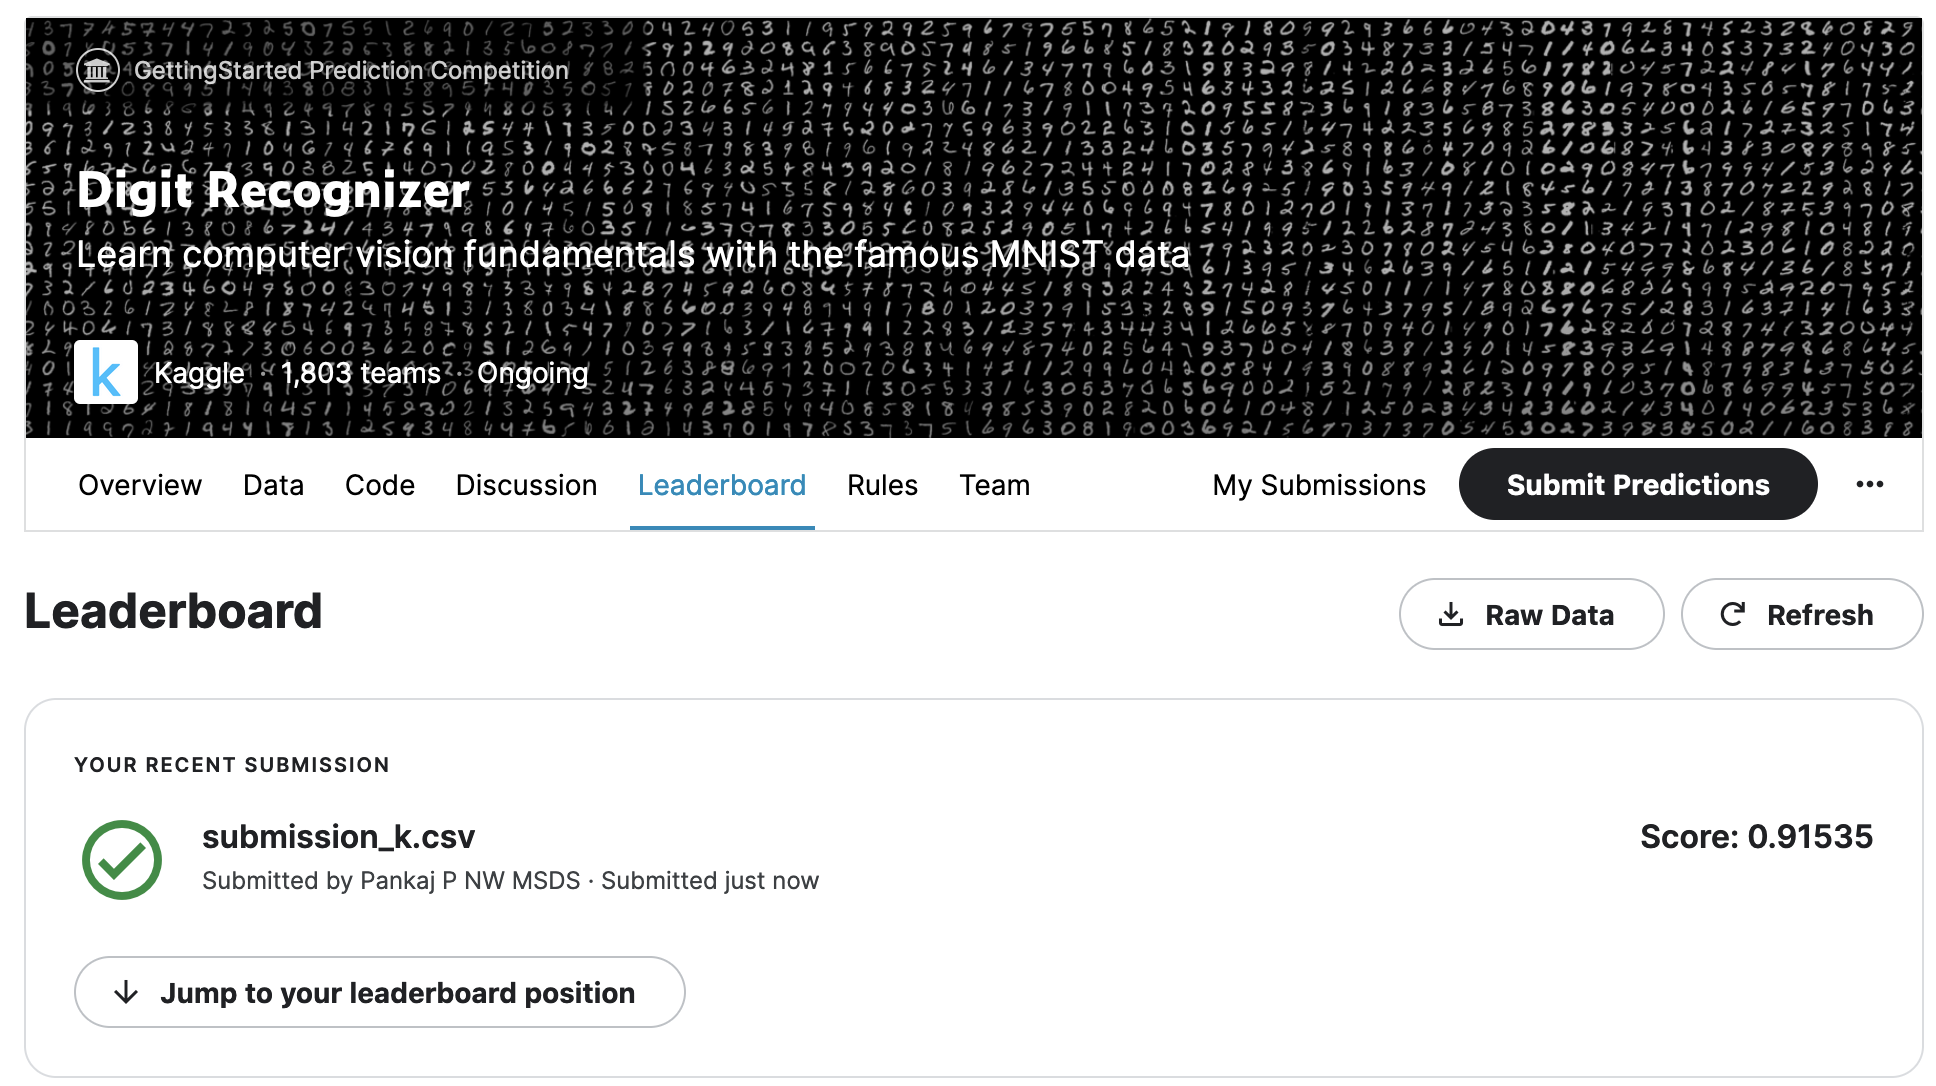

# Cross-Validation Design

In [ ]:
train_df = pd.read_csv(w6_files+"/train.csv")
test_df = pd.read_csv(w6_files+"/test.csv")

In [ ]:
X = train_df.drop(['label'], axis=1)
y = train_df['label']

print("X shape",X.shape)
print("y shape",y.shape)

X shape (42000, 784)
y shape (42000,)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=101)
print("x_train shape",X_train.shape)
print("x_test shape",X_valid.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_valid.shape)


x_train shape (33600, 784)
x_test shape (8400, 784)
y_train shape (33600,)
y_test shape (8400,)


In [ ]:

start_time = datetime.now()
rf_reg = RandomForestRegressor(n_estimators=100 ,
                             max_depth=5 , max_features = 'log2',
                             min_samples_split = 16)
#Train the model using the training sets
rf_reg.fit(X_train,y_train)
y_pred = cross_val_predict(rf_reg, X_train, y_train, cv = 3)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


RandomForestRegressor(max_depth=5, max_features='log2', min_samples_split=16)

Duration: 0:00:06.094595


In [ ]:
rsqure_score = rf_reg.score(X_train,y_train)
print('R^2: {}'.format(rsqure_score))



R^2: 0.5350418081171263


In [ ]:
%%time
cv_r2_scores_rf = cross_val_score(rf_reg, X, y, cv=24,scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))


[0.53598396 0.51244237 0.52522938 0.55000575 0.54042975 0.52890477
 0.53737132 0.51744291 0.52730603 0.52708824 0.53792384 0.53157985
 0.51568199 0.52560275 0.51118652 0.51265497 0.53784196 0.51742751
 0.53571615 0.54421803 0.5328845  0.53014876 0.54106754 0.52970578]
Mean 5-Fold R Squared: 0.5294101939710815
CPU times: user 57.2 s, sys: 140 ms, total: 57.3 s
Wall time: 57.1 s


In [ ]:
print("X shape",X.shape)
print("y shape",y.shape)

X shape (42000, 784)
y shape (42000,)


In [ ]:
kf = KFold(n_splits = 5, shuffle = True)
#rf_reg = RandomForestRegressor()
clf = RandomForestClassifier(random_state = 777)


In [ ]:
scores = []
for i in range(5):
    result = next(kf.split(X), None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = clf.fit(x_train,y_train)
    predictions = rf_reg.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))



Scores from each Iteration:  [0.9660714285714286, 0.9625, 0.964047619047619, 0.9602380952380952, 0.9679761904761904]
Average K-Fold Score : 0.9641666666666666


In [ ]:
y.head()
y.value_counts()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

I found the code using Keras Sequential API, where you have just to add one layer at a time, starting from the input.

The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. I choosed to set 32 filters for the two firsts conv2D layers and 64 filters for the two last ones. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

The CNN can isolate features that are useful everywhere from these transformed images (feature maps).

The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important.

Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.

In [ ]:
import time
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [ ]:
def plot_history(model):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(17,5))
    ax1.plot(model.history.history['val_accuracy'], 'r', label = 'Validation Accuracy')
    ax1.plot(model.history.history['accuracy'], 'b',label = 'Training Accuracy')
    ax1.set_title('Training and Validation Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.grid()
    ax1.legend(loc = "upper left")
    ax2.plot(model.history.history['val_loss'], 'r',label = 'Validation Loss')
    ax2.plot(model.history.history['loss'], 'b',label = 'Training Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.set_title('Training and Validation loss')
    ax2.grid()
    plt.legend(loc = "upper left")

In [ ]:
def plot_confusion_matrix(y_true,y_pred):
    fig = plt.figure(figsize=(5,5))
    #matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(confusion_matrix(y_true, y_pred),annot=True,fmt='5.0f',cmap="Blues")
    plt.title('Confusion Matrix : Actual v/s Predicted', y=1.05, size=15)
    ax = fig.add_subplot(111)
    plt.xlabel("Predicted Digits")
    plt.ylabel("Actual Digits")
    plt.show()

# Convolutional Neural Net

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '6')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, '0')

(-0.5, 27.5, 27.5, -0.5)

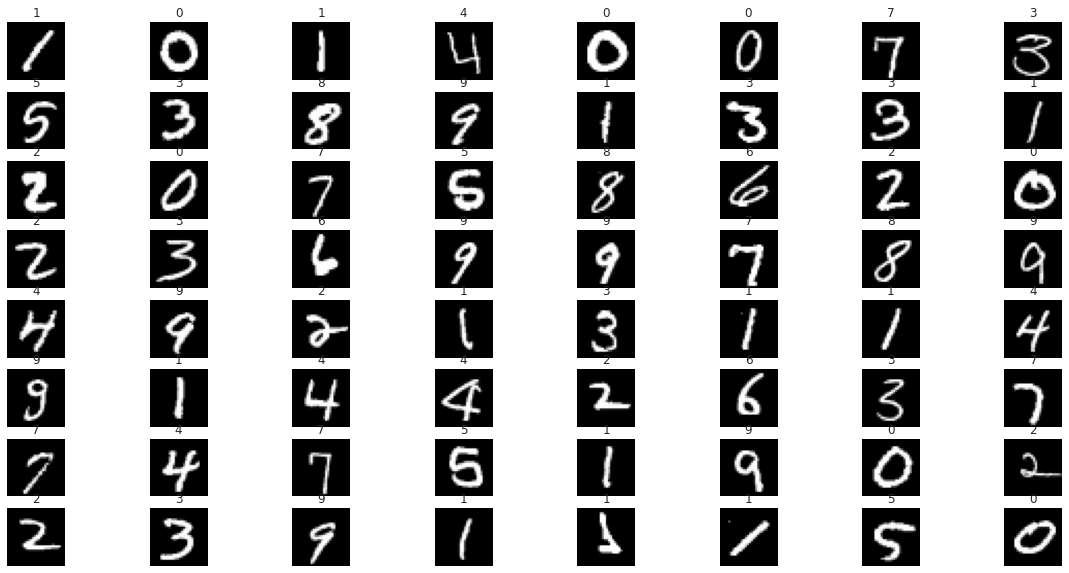

In [ ]:
train_data = train_df.drop(['label'], axis=1)
y_labels = train_df['label']

X = train_data.values.reshape(-1,28,28)

class Scale(BaseEstimator, TransformerMixin):
  def __init__(self):
    pass
  def fit(self, X, y = None):
    return self
  def transform(self, X, y = None):  
    return X/255

pipeline = Pipeline(steps = [
                                   ('Scale', Scale())
                                  ])

#Preprocess
X_preproc = pipeline.fit_transform(X)
test_preproc = pipeline.fit_transform(test_df)
X_test = test_preproc

fig, axes = plt.subplots(nrows = 8, ncols = 8, figsize  = (20,10))
for i,ax in enumerate(axes.flatten()):
  ax.imshow(X_preproc[i].reshape(28,28), cmap = 'gray')
  ax.set_title(y[i].round(2))
  ax.axis('off');




In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_preproc, y_labels, test_size=0.2, random_state=101)

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_val: {}".format(X_valid.shape))
print("Shape of test_df: {}".format(test_df.shape))

print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_val: {}".format(y_valid.shape))


Shape of X_train: (33600, 28, 28)
Shape of X_val: (8400, 28, 28)
Shape of test_df: (28000, 784)
Shape of y_train: (33600,)
Shape of y_val: (8400,)


## CNN with 2 Layers


In [ ]:
tf.keras.backend.clear_session()  # For easy reset of notebook state.

inputs = keras.Input(shape=(28,28, 1)) #H x W x Channels

conv2d = layers.Conv2D(filters = 2, kernel_size = (1,1), strides = (1,1), activation = ('relu'), padding = 'Same')(inputs)
pool = layers.MaxPooling2D(1,1)(conv2d)

conv2d_2 = layers.Conv2D(filters = 16, kernel_size = (2,2), strides = (1,1), activation = ('relu'), padding = 'Same')(pool)
pool_2 = layers.MaxPooling2D(1,1)(conv2d_2)

flatten_2 = layers.Flatten()(pool_2)
outputs = layers.Dense(10 ,activation = 'softmax')(flatten_2)

model = keras.Model(inputs=inputs, outputs=outputs, name='xor')

# For use with non-categorical labels

model.compile(optimizer='rmsprop',           
# model.compile(optimizer=keras.optimizers.SGD(lr=1e-3),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


In [ ]:
model.summary()

Model: "xor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 2)         4         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 2)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        144       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0       

In [ ]:
X_train_exp_1 = X_train.copy().reshape(X_train.shape[0], 28,28)
X_valid_exp_1 = X_valid.copy().reshape(X_valid.shape[0],28,28)

In [ ]:
#FITTING, and storing for plotting and call backs
history = model.fit(X_train,y_train, validation_data = (X_valid,y_valid), epochs=10, verbose = 1)

Epoch 1/10
1050/1050 [==============================] - 14s 4ms/step - loss: 2.3018 - accuracy: 0.1094 - val_loss: 2.3010 - val_accuracy: 0.1129
Epoch 2/10
1050/1050 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1112 - val_loss: 2.3009 - val_accuracy: 0.1129
Epoch 3/10
1050/1050 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1112 - val_loss: 2.3010 - val_accuracy: 0.1129
Epoch 4/10
1050/1050 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1112 - val_loss: 2.3010 - val_accuracy: 0.1129
Epoch 5/10
1050/1050 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1112 - val_loss: 2.3009 - val_accuracy: 0.1129
Epoch 6/10
1050/1050 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1112 - val_loss: 2.3010 - val_accuracy: 0.1129
Epoch 7/10
1050/1050 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1112 - val_loss: 2.3009 - val_accuracy

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

<Figure size 432x288 with 0 Axes>

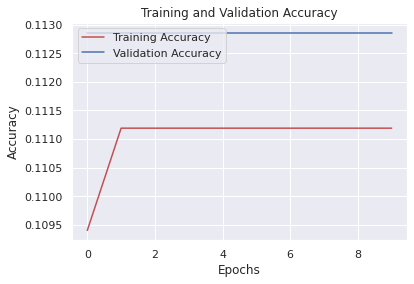

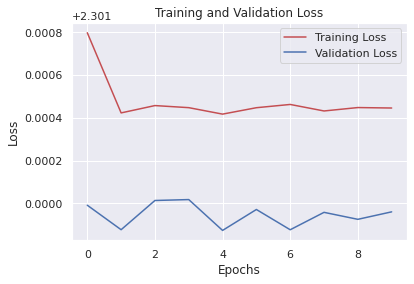

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = "upper left")
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = "upper right")
plt.figure()

Overall Accuracy Score:  0.11285714285714285
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       789
           1       0.11      1.00      0.20       948
           2       0.00      0.00      0.00       859
           3       0.00      0.00      0.00       859
           4       0.00      0.00      0.00       818
           5       0.00      0.00      0.00       733
           6       0.00      0.00      0.00       824
           7       0.00      0.00      0.00       873
           8       0.00      0.00      0.00       820
           9       0.00      0.00      0.00       877

    accuracy                           0.11      8400
   macro avg       0.01      0.10      0.02      8400
weighted avg       0.01      0.11      0.02      8400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: Mat

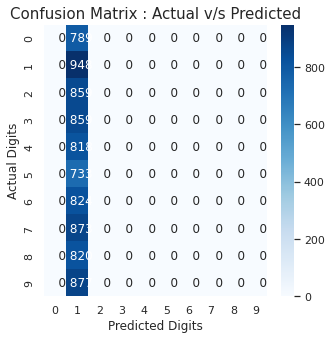

In [ ]:
exp_val_preds = model.predict(X_valid.copy().reshape(X_valid.shape[0],28,28))
print("Overall Accuracy Score: ", accuracy_score(y_valid, exp_val_preds.argmax(axis = 1)))
print(classification_report(y_valid, exp_val_preds.argmax(axis = 1)))

plot_confusion_matrix(y_valid, exp_val_preds.argmax(axis = 1))


## DNN with 2 layer, 10 nodes

In [ ]:
time_callback_1 = TimeHistory()
X_train_exp_1= X_train.copy().reshape(X_train.shape[0], 28,28)
X_valid_exp_1 = X_valid.copy().reshape(X_valid.shape[0],28,28)
results = {}

tf.keras.backend.clear_session()  # For easy reset of notebook state.

inputs = keras.Input(shape=(28,28, 1)) #H x W x Channels

x = layers.Flatten()(inputs)

x = layers.Dense(64 ,activation = 'relu')(x)
x = layers.Dense(32 ,activation = 'relu')(x)
#x = layers.Dense(16 ,activation = 'relu')(x)
#x = layers.Dense(8 ,activation = 'relu')(x)
#x = layers.Dense(4 ,activation = 'relu')(x)


outputs = layers.Dense(10 ,activation = 'softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_exp_1')

# For use with non-categorical labels
model.compile(optimizer='adam',           
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

#FITTING, and storing for plotting and call backs
history = model.fit(X_train_exp_1,y_train, validation_data = (X_valid_exp_1,y_valid), epochs=10, verbose = 1, callbacks = [time_callback_1])
results['exp1'] = history.history

Epoch 1/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3673 - accuracy: 0.8917 - val_loss: 0.1798 - val_accuracy: 0.9464
Epoch 2/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1550 - accuracy: 0.9538 - val_loss: 0.1524 - val_accuracy: 0.9511
Epoch 3/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.1121 - accuracy: 0.9662 - val_loss: 0.1234 - val_accuracy: 0.9623
Epoch 4/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0879 - accuracy: 0.9731 - val_loss: 0.1169 - val_accuracy: 0.9640
Epoch 5/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.0688 - accuracy: 0.9788 - val_loss: 0.1301 - val_accuracy: 0.9596
Epoch 6/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.0580 - accuracy: 0.9820 - val_loss: 0.1136 - val_accuracy: 0.9658
Epoch 7/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.0483 - accuracy: 0.9844 - val_loss: 0.1005 - val_accuracy:

In [ ]:
results['exp1']

{'accuracy': [0.8917261958122253,
  0.9537500143051147,
  0.9661607146263123,
  0.9731249809265137,
  0.9788392782211304,
  0.9820238351821899,
  0.9844047427177429,
  0.9870238304138184,
  0.9893452525138855,
  0.9908928275108337],
 'loss': [0.3672730624675751,
  0.15502320230007172,
  0.11210350692272186,
  0.08789434283971786,
  0.06877600401639938,
  0.05804664269089699,
  0.048277776688337326,
  0.04179595783352852,
  0.03330443054437637,
  0.028187936171889305],
 'val_accuracy': [0.9464285969734192,
  0.9510714411735535,
  0.9622619152069092,
  0.9640476107597351,
  0.9596428275108337,
  0.965833306312561,
  0.9705952405929565,
  0.9700000286102295,
  0.9678571224212646,
  0.9719047546386719],
 'val_loss': [0.17983406782150269,
  0.1523609757423401,
  0.1234479621052742,
  0.1168828010559082,
  0.13014838099479675,
  0.11355875432491302,
  0.10045929253101349,
  0.1016853004693985,
  0.11433953791856766,
  0.10167711228132248]}

In [ ]:
model.summary()

Model: "mnist_exp_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


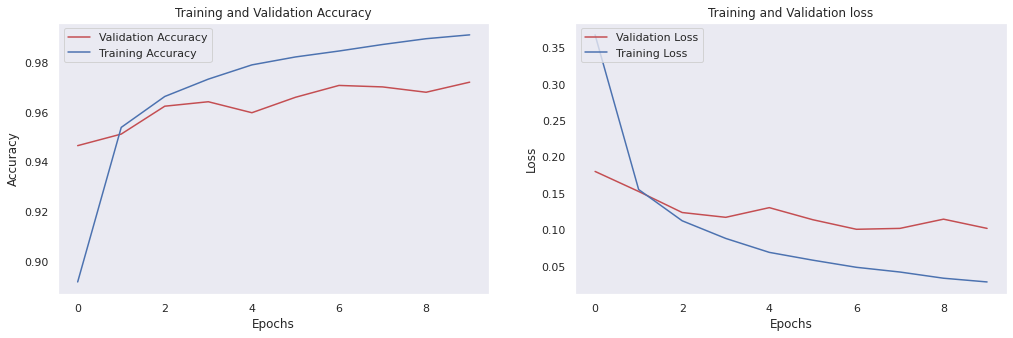

In [ ]:
plot_history(model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


<Figure size 864x864 with 0 Axes>

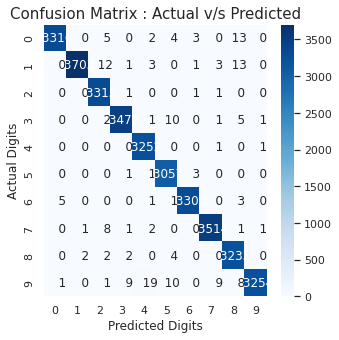

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


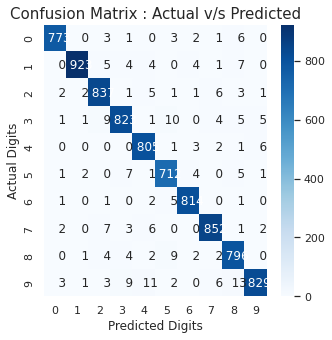

In [ ]:
fig = plt.figure(figsize=(12,12))

exp1_train_preds = model.predict(X_train.copy().reshape(X_train.shape[0],28,28))
plot_confusion_matrix(y_train, exp1_train_preds.argmax(axis = 1));

exp1_valid_preds = model.predict(X_valid.copy().reshape(X_valid.shape[0],28,28))
plot_confusion_matrix(y_valid, exp1_valid_preds.argmax(axis = 1));


In [ ]:
time_callback_1.times


[3.104956865310669,
 2.4824440479278564,
 2.527959108352661,
 2.494269371032715,
 2.5011188983917236,
 2.501375675201416,
 2.5115456581115723,
 2.493124008178711,
 2.41812801361084,
 2.435093641281128]

In [ ]:
print("Overall training Accuracy Score: ", accuracy_score(y_train, exp1_train_preds.argmax(axis = 1)))
print(classification_report(y_train, exp1_train_preds.argmax(axis = 1)))

print("Overall test Accuracy Score: ", accuracy_score(y_valid, exp1_valid_preds.argmax(axis = 1)))
print(classification_report(y_valid, exp1_valid_preds.argmax(axis = 1)))

Overall training Accuracy Score:  0.9946130952380953
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3343
           1       1.00      0.99      1.00      3736
           2       0.99      1.00      1.00      3318
           3       1.00      0.99      0.99      3492
           4       0.99      1.00      1.00      3254
           5       0.99      1.00      0.99      3062
           6       1.00      1.00      1.00      3313
           7       1.00      1.00      1.00      3528
           8       0.99      1.00      0.99      3243
           9       1.00      0.98      0.99      3311

    accuracy                           0.99     33600
   macro avg       0.99      0.99      0.99     33600
weighted avg       0.99      0.99      0.99     33600

Overall test Accuracy Score:  0.9719047619047619
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       789
           1       0.99      0

## DNN with 3 layer, 20 nodes

In [ ]:

time_callback_2 = TimeHistory()
X_train_exp_2= X_train.copy().reshape(X_train.shape[0], 28,28)
X_valid_exp_2 = X_valid.copy().reshape(X_valid.shape[0],28,28)

tf.keras.backend.clear_session()  # For easy reset of notebook state.

inputs = keras.Input(shape=(28,28, 1)) #H x W x Channels

x = layers.Flatten()(inputs)

x = layers.Dense(128 ,activation = 'relu')(x)
x = layers.Dense(64 ,activation = 'relu')(x)
x = layers.Dense(32 ,activation = 'relu')(x)
#x = layers.Dense(8 ,activation = 'relu')(x)
#x = layers.Dense(4 ,activation = 'relu')(x)


outputs = layers.Dense(20 ,activation = 'softmax')(x)

model1 = keras.Model(inputs=inputs, outputs=outputs, name='mnist_exp_2')

# For use with non-categorical labels
model1.compile(optimizer='adam',           
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

#FITTING, and storing for plotting and call backs
history = model1.fit(X_train_exp_2,y_train, validation_data = (X_valid_exp_2,y_valid), epochs=10, verbose = 1, callbacks = [time_callback_2])
results['exp2'] = history.history

Epoch 1/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3567 - accuracy: 0.8949 - val_loss: 0.1547 - val_accuracy: 0.9552
Epoch 2/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1333 - accuracy: 0.9593 - val_loss: 0.1204 - val_accuracy: 0.9654
Epoch 3/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0906 - accuracy: 0.9716 - val_loss: 0.1052 - val_accuracy: 0.9692
Epoch 4/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0680 - accuracy: 0.9791 - val_loss: 0.1065 - val_accuracy: 0.9671
Epoch 5/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0566 - accuracy: 0.9819 - val_loss: 0.1119 - val_accuracy: 0.9667
Epoch 6/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0445 - accuracy: 0.9861 - val_loss: 0.0978 - val_accuracy: 0.9720
Epoch 7/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0369 - accuracy: 0.9878 - val_loss: 0.1086 - val_accuracy:

In [ ]:
model1.summary()

Model: "mnist_exp_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 20)                660       
                                                                 
Total params: 111,476
Trainable params: 111,476
Non-tra

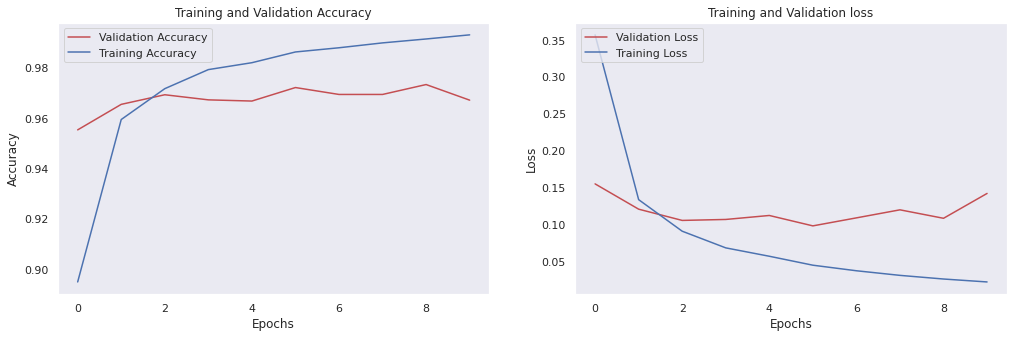

In [ ]:
plot_history(model1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


<Figure size 864x864 with 0 Axes>

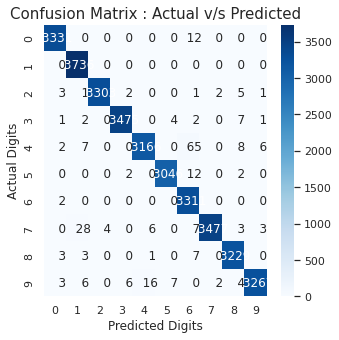

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


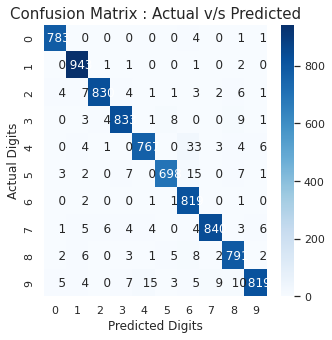

In [ ]:
fig = plt.figure(figsize=(12,12))

exp1_train_preds = model1.predict(X_train.copy().reshape(X_train.shape[0],28,28))
plot_confusion_matrix(y_train, exp1_train_preds.argmax(axis = 1));

exp1_valid_preds = model1.predict(X_valid.copy().reshape(X_valid.shape[0],28,28))
plot_confusion_matrix(y_valid, exp1_valid_preds.argmax(axis = 1));


In [ ]:
time_callback_2.times


[3.231152296066284,
 2.6693551540374756,
 2.664710521697998,
 2.683854103088379,
 2.684546947479248,
 2.712200403213501,
 2.6756184101104736,
 2.693455457687378,
 2.6267290115356445,
 2.6595520973205566]

In [ ]:
print("Overall training Accuracy Score: ", accuracy_score(y_train, exp1_train_preds.argmax(axis = 1)))
print(classification_report(y_train, exp1_train_preds.argmax(axis = 1)))

print("Overall test Accuracy Score: ", accuracy_score(y_valid, exp1_valid_preds.argmax(axis = 1)))
print(classification_report(y_valid, exp1_valid_preds.argmax(axis = 1)))

Overall training Accuracy Score:  0.9922916666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3343
           1       0.99      1.00      0.99      3736
           2       1.00      1.00      1.00      3318
           3       1.00      1.00      1.00      3492
           4       0.99      0.97      0.98      3254
           5       1.00      0.99      1.00      3062
           6       0.97      1.00      0.98      3313
           7       1.00      0.99      0.99      3528
           8       0.99      1.00      0.99      3243
           9       1.00      0.99      0.99      3311

    accuracy                           0.99     33600
   macro avg       0.99      0.99      0.99     33600
weighted avg       0.99      0.99      0.99     33600

Overall test Accuracy Score:  0.9670238095238095
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       789
           1       0.97      0

## DNN with 5 layer, 10 nodes

In [ ]:
time_callback_3 = TimeHistory()
X_train_exp_3= X_train.copy().reshape(X_train.shape[0], 28,28)
X_valid_exp_3 = X_valid.copy().reshape(X_valid.shape[0],28,28)

tf.keras.backend.clear_session()  # For easy reset of notebook state.

inputs = keras.Input(shape=(28,28, 1)) #H x W x Channels

x = layers.Flatten()(inputs)

x = layers.Dense(256 ,activation = 'relu')(x)
x = layers.Dense(128 ,activation = 'relu')(x)
x = layers.Dense(64 ,activation = 'relu')(x)
x = layers.Dense(32 ,activation = 'relu')(x)
x = layers.Dense(16 ,activation = 'relu')(x)


outputs = layers.Dense(10 ,activation = 'softmax')(x)

model2 = keras.Model(inputs=inputs, outputs=outputs, name='mnist_exp_3')

# For use with non-categorical labels
model2.compile(optimizer='adam',           
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

#FITTING, and storing for plotting and call backs
history = model2.fit(X_train_exp_3,y_train, validation_data = (X_valid_exp_3,y_valid), epochs=10, verbose = 1, callbacks = [time_callback_3])
results['exp3'] = history.history

Epoch 1/10
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3447 - accuracy: 0.8957 - val_loss: 0.1680 - val_accuracy: 0.9524
Epoch 2/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1334 - accuracy: 0.9602 - val_loss: 0.1655 - val_accuracy: 0.9475
Epoch 3/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0876 - accuracy: 0.9737 - val_loss: 0.0965 - val_accuracy: 0.9707
Epoch 4/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0722 - accuracy: 0.9778 - val_loss: 0.1035 - val_accuracy: 0.9693
Epoch 5/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0562 - accuracy: 0.9817 - val_loss: 0.0943 - val_accuracy: 0.9749
Epoch 6/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.0896 - val_accuracy: 0.9758
Epoch 7/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0403 - accuracy: 0.9874 - val_loss: 0.1162 - val_accuracy:

In [ ]:
model2.summary()

Model: "mnist_exp_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                

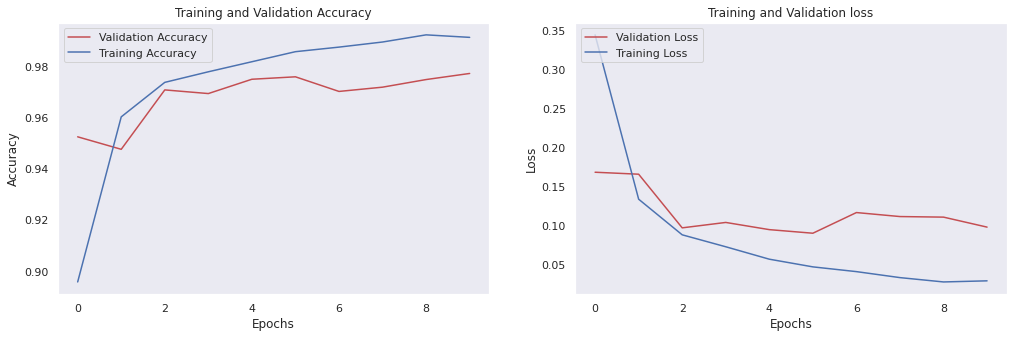

In [ ]:
plot_history(model2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


<Figure size 864x864 with 0 Axes>

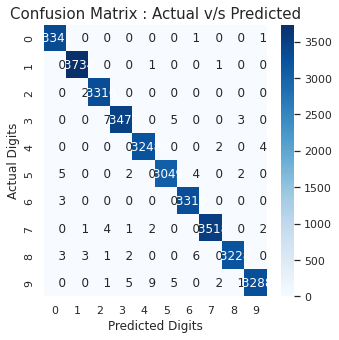

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


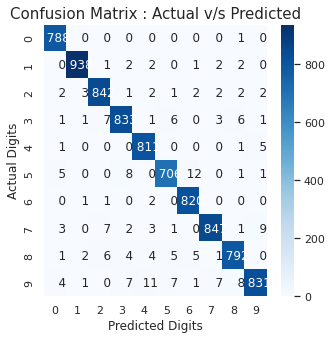

In [ ]:
fig = plt.figure(figsize=(12,12))

exp1_train_preds = model2.predict(X_train.copy().reshape(X_train.shape[0],28,28))
plot_confusion_matrix(y_train, exp1_train_preds.argmax(axis = 1));

exp1_valid_preds = model2.predict(X_valid.copy().reshape(X_valid.shape[0],28,28))
plot_confusion_matrix(y_valid, exp1_valid_preds.argmax(axis = 1));


In [ ]:
time_callback_3.times


[3.6344244480133057,
 3.040663957595825,
 3.050861358642578,
 2.986889362335205,
 2.9803237915039062,
 2.911146879196167,
 2.8983612060546875,
 2.877377510070801,
 2.9261481761932373,
 2.909327507019043]

In [ ]:
print("Overall training Accuracy Score: ", accuracy_score(y_train, exp1_train_preds.argmax(axis = 1)))
print(classification_report(y_train, exp1_train_preds.argmax(axis = 1)))

print("Overall test Accuracy Score: ", accuracy_score(y_valid, exp1_valid_preds.argmax(axis = 1)))
print(classification_report(y_valid, exp1_valid_preds.argmax(axis = 1)))

Overall training Accuracy Score:  0.9972916666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3343
           1       1.00      1.00      1.00      3736
           2       1.00      1.00      1.00      3318
           3       1.00      1.00      1.00      3492
           4       1.00      1.00      1.00      3254
           5       1.00      1.00      1.00      3062
           6       1.00      1.00      1.00      3313
           7       1.00      1.00      1.00      3528
           8       1.00      1.00      1.00      3243
           9       1.00      0.99      1.00      3311

    accuracy                           1.00     33600
   macro avg       1.00      1.00      1.00     33600
weighted avg       1.00      1.00      1.00     33600

Overall test Accuracy Score:  0.9771428571428571
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       789
           1       0.99      0

# NN Experiments Comparison

## Accuracy & Loss

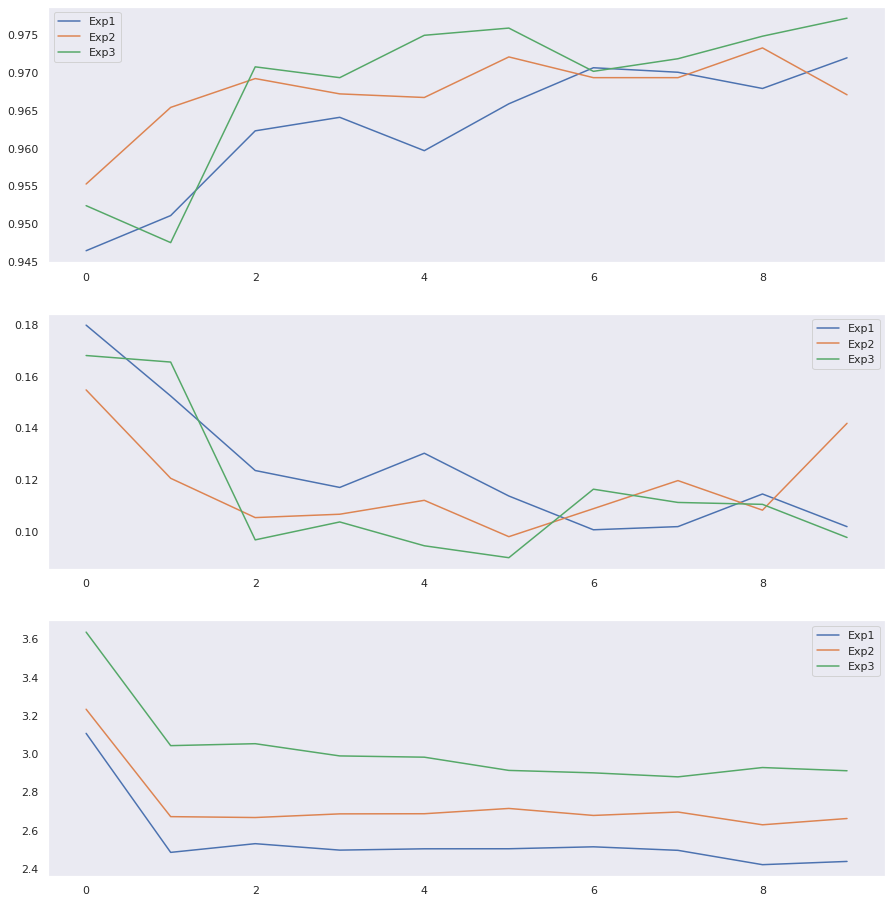

In [ ]:
def plot_accuracies(ax):
  ax.plot(results['exp1']['val_accuracy'], label = "Exp1")
  ax.plot(results['exp2']['val_accuracy'], label = "Exp2")
  ax.plot(results['exp3']['val_accuracy'], label = "Exp3")
  #ax.plot(results['exp4']['val_accuracy'], label = "Exp4")
  ax.grid();
  ax.legend();



def plot_losses(ax):
  ax.plot(results['exp1']['val_loss'], label = "Exp1")
  ax.plot(results['exp2']['val_loss'], label = "Exp2")
  ax.plot(results['exp3']['val_loss'], label = "Exp3")
  #ax.plot(results['exp4']['val_loss'], label = "Exp4")
  ax.grid();
  ax.legend();


def plot_times(ax):
  ax.plot(time_callback_1.times, label = "Exp1")
  ax.plot(time_callback_2.times, label = "Exp2")
  ax.plot(time_callback_3.times, label = "Exp3")
  #ax.plot(time_callback_4.times, label = "Exp4")
  ax.grid();
  ax.legend();


fig, (ax1, ax2,ax3) = plt.subplots(3,1, figsize = (15,16))
plot_accuracies(ax1)
plot_losses(ax2)
plot_times(ax3)

In [ ]:
df = pd.concat([
           pd.DataFrame(results['exp1']),
           pd.DataFrame(results['exp2']),
           pd.DataFrame(results['exp3']),
])  

e = 10
l = ['Exp1', 'Exp2', 'Exp3']
df['model'] = [ele for ele in l for i in range(e)]


#df.drop_duplicates()
df.shape
df.info()
#df.head()
df.columns.duplicated().any()

df = df.reset_index(drop=True)

(30, 5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   loss          30 non-null     float64
 1   accuracy      30 non-null     float64
 2   val_loss      30 non-null     float64
 3   val_accuracy  30 non-null     float64
 4   model         30 non-null     object 
dtypes: float64(4), object(1)
memory usage: 1.4+ KB


False

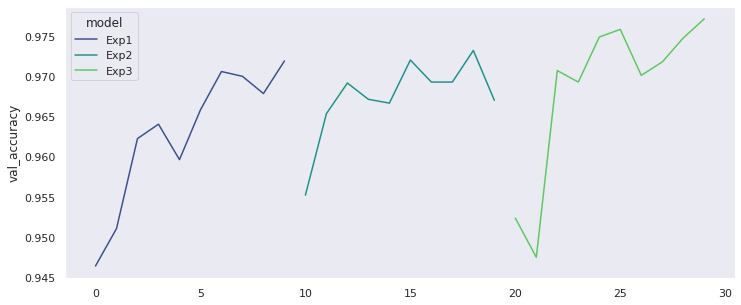

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (12,5))
plt.grid();
sns.lineplot(range(30), 'val_accuracy', hue = 'model', data = df,  palette = 'viridis', ax = ax)


#Conclusion






#References:

 - https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

 - https://keras.io/api/layers/activations/

 - https://iq.opengenus.org/dense-layer-in-tensorflow/

 


